### STEP 1 Fare una richiesta all'API

In [1]:
import requests
import pandas as pd

# URL dell'endpoint
url = "https://whiskyhunter.net/api/distilleries_info/"

# Effettua la richiesta
response = requests.get(url)

# Controllo lo stato della risposta
if response.status_code == 200:
    print("Dati scaricati con successo!")
    data = response.json()  # Convertiamo i dati in formato JSON
else:
    print(f"Errore nella richiesta: {response.status_code}")

# Decodifica i dati in formato JSON
data = response.json()

Dati scaricati con successo!


### STEP 2 : Esplorare la struttura dei dati

In [2]:
# Verifico il tipo di dati restituiti
print(type(data))  # Lista o Dizionario?

# Stampa i primi due elementi per capire la struttura
print(data[:2])


<class 'list'>
[{'name': '8 Doors Distillery', 'slug': '8_doors', 'country': 'Scotland', 'whiskybase_whiskies': '6', 'whiskybase_votes': '11', 'whiskybase_rating': '83.0'}, {'name': 'Abbeyhill Distillery', 'slug': 'abbeyhill', 'country': 'Scotland', 'whiskybase_whiskies': '0', 'whiskybase_votes': '0', 'whiskybase_rating': '0.0'}]


Il dato restituito è una lista di dizionari. Ogni elemento della lista rappresenta una distilleria, e i dizionari contengono dettagli come name, slug, country, whiskybase_whiskies, whiskybase_votes e whiskybase_rating.

### STEP 3 : Caricare i dati in un DataFrame Pandas

In [3]:
import pandas as pd

# Creazione del DataFrame
df = pd.DataFrame(data)

# Visualizza le prime righe
print(df.head())

# Controlla le colonne disponibili
print(df.columns)


                   name       slug   country whiskybase_whiskies  \
0    8 Doors Distillery    8_doors  Scotland                   6   
1  Abbeyhill Distillery  abbeyhill  Scotland                   0   
2  Aberargie Distillery  aberargie  Scotland                   1   
3             Aberfeldy  aberfeldy  Scotland                 542   
4              Aberlour   aberlour  Scotland                1386   

  whiskybase_votes whiskybase_rating  
0               11              83.0  
1                0               0.0  
2                0               0.0  
3             9539             84.28  
4            31470             85.09  
Index(['name', 'slug', 'country', 'whiskybase_whiskies', 'whiskybase_votes',
       'whiskybase_rating'],
      dtype='object')


### STEP 4 : Analisi dei dati 

In [4]:
# Numero totale delle distillerie 
print(f"Numero totale di distillerie: {len(df)}")


Numero totale di distillerie: 313


In [5]:
# Distillerie per paese
print(df['country'].value_counts())


country
Scotland    250
Japan        56
Taiwan        7
Name: count, dtype: int64


In [6]:
# Distillerie con più voti:

df['whiskybase_votes'] = pd.to_numeric(df['whiskybase_votes'])  # Converto i voti in numeri
distillerie_piu_votate = df.sort_values(by='whiskybase_votes', ascending=False)
print(distillerie_piu_votate[['name', 'whiskybase_votes']].head())


              name  whiskybase_votes
267     Springbank            123093
50   Bruichladdich            115104
13          Ardbeg            106110
187      Laphroaig             95799
59        Caol Ila             90035


In [7]:
# Distillerie con il puntegio pià alto
df['whiskybase_rating'] = pd.to_numeric(df['whiskybase_rating'])  # Converto i rating in numeri
distillerie_top_rating = df.sort_values(by='whiskybase_rating', ascending=False)
print(distillerie_top_rating[['name', 'whiskybase_rating']].head())


                                name  whiskybase_rating
41             Ben Wyvis / Ferintosh              92.00
116  Glenfyne (Glendarroch Glenglip)              91.33
167                         Kawasaki              90.04
49                             Brora              89.93
125                        Glenlochy              89.88


In [8]:
#Dettagli di una specifica distilleria 
print(df[df['name'] == 'Glenfiddich'])


            name         slug   country whiskybase_whiskies  whiskybase_votes  \
113  Glenfiddich  glenfiddich  Scotland                1522             32186   

     whiskybase_rating  
113              84.67  


### STEP 5 : creare visualizzazioni 

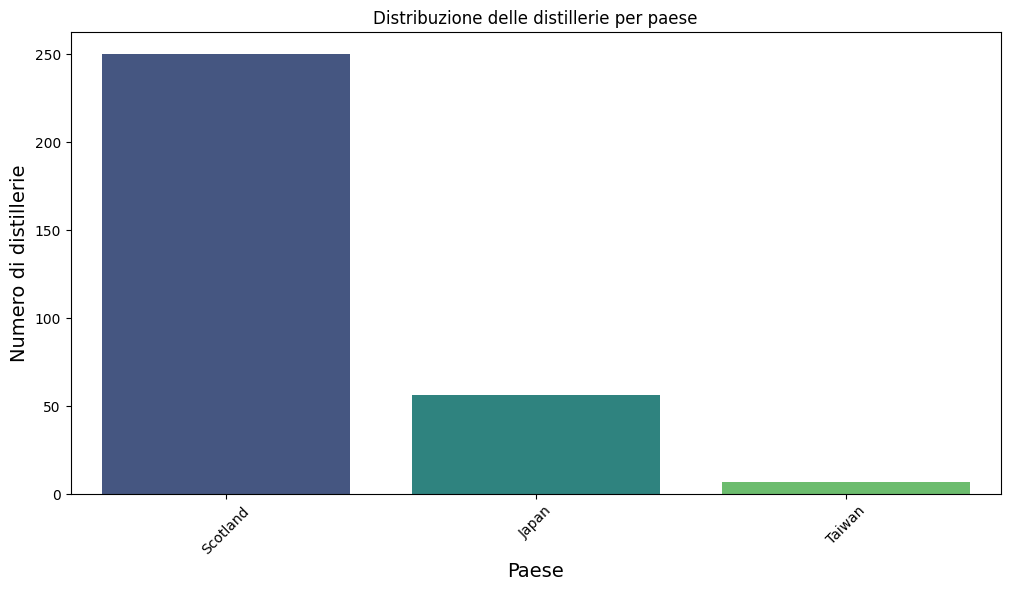

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


# Conteggio delle distillerie per paese
country_counts = df['country'].value_counts()

# Grafico a barre
plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.index, y=country_counts.values, hue=country_counts.index, palette="viridis")
plt.title("Distribuzione delle distillerie per paese")
plt.xlabel("Paese", fontsize=14)
plt.ylabel("Numero di distillerie", fontsize=14)
plt.xticks(rotation=45)
plt.show()


 Questo grafico mostra il numero di distillerie presenti in ciascun paese. Non è strano che  Paesi come la Scozia  dominano il grafico, essendo storicamente uno dei principali produttori di whisky.

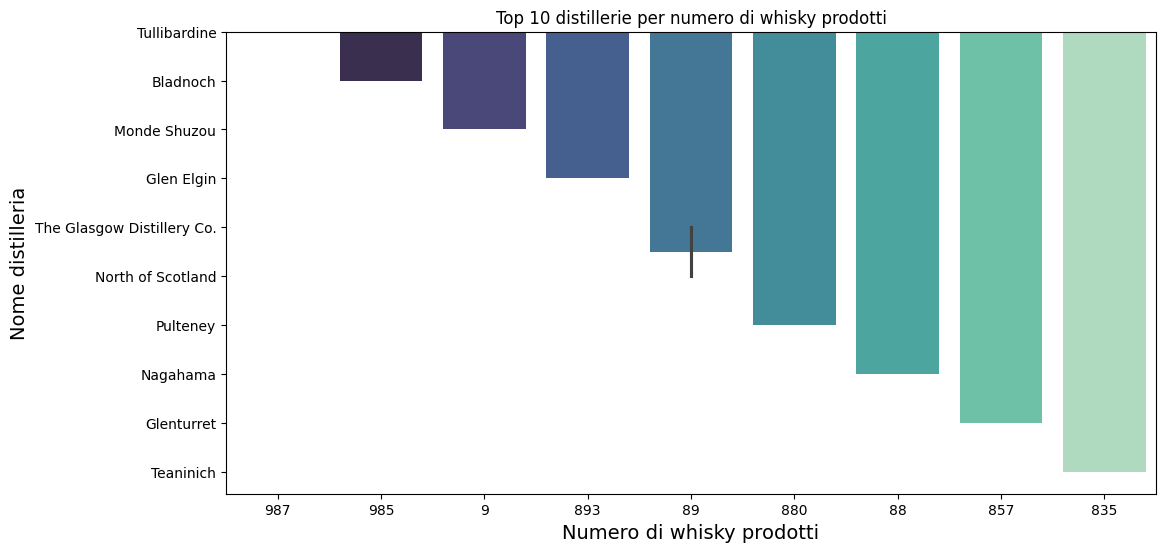

In [9]:


# Ordinamento per il numero di whisky prodotti
top_distilleries_whiskies = df.sort_values(by='whiskybase_whiskies', ascending=False).head(10)

# Grafico 
plt.figure(figsize=(12, 6))
sns.barplot(x=top_distilleries_whiskies['whiskybase_whiskies'], 
            y=top_distilleries_whiskies['name'], hue= top_distilleries_whiskies['whiskybase_whiskies'],
            palette="mako")
plt.title("Top 10 distillerie per numero di whisky prodotti")
plt.xlabel("Numero di whisky prodotti", fontsize=14)
plt.ylabel("Nome distilleria", fontsize=14)
plt.show()


Qual è la distilleria con il rating più alto?

In [10]:

distilleria_top = df.loc[df['whiskybase_rating'].idxmax()]
print(f"Distilleria con il rating più alto: {distilleria_top['name']}")
print(distilleria_top)


Distilleria con il rating più alto: Ben Wyvis / Ferintosh
name                   Ben Wyvis / Ferintosh
slug                   ben_wyvis_/_ferintosh
country                             Scotland
whiskybase_whiskies                        2
whiskybase_votes                           2
whiskybase_rating                       92.0
Name: 41, dtype: object


Quante distillerie hanno un rating di 0?

In [11]:
distillerie_senza_rating = df[df['whiskybase_rating'] == 0.0]
print(f"Numero di distillerie senza rating: {len(distillerie_senza_rating)}")


Numero di distillerie senza rating: 69


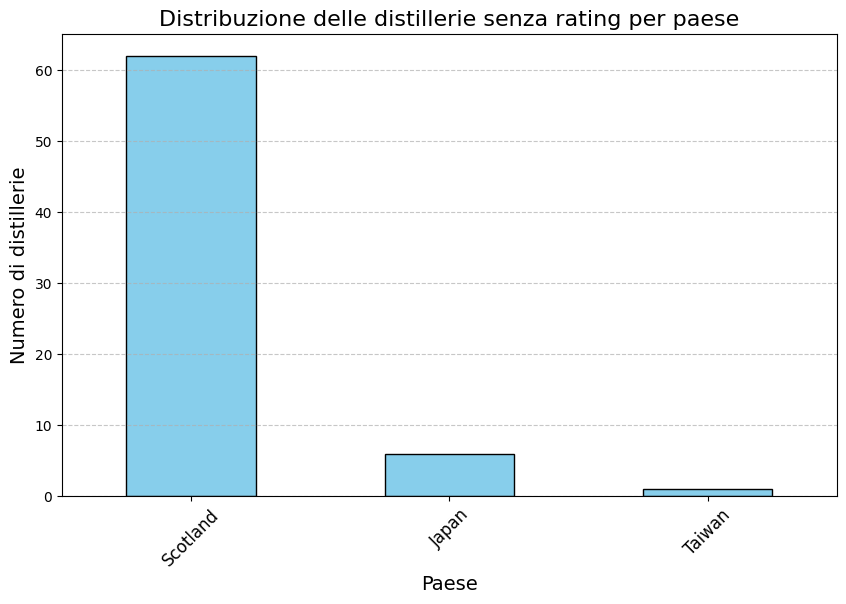

In [12]:
# Calcola la distribuzione per paese
paesi_senza_rating = distillerie_senza_rating['country'].value_counts()

# Grafico a barre
plt.figure(figsize=(10, 6))
paesi_senza_rating.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribuzione delle distillerie senza rating per paese", fontsize=16)
plt.xlabel("Paese", fontsize=14)
plt.ylabel("Numero di distillerie", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Verifica dei dettagli delle distillerie senza rating
Stampo un'anteprima delle distillerie senza rating per avere un'idea più chiara dei loro dettagli.

In [13]:
# Mostra le prime 10 distillerie senza rating
print(distillerie_senza_rating.head(10))


                    name           slug   country whiskybase_whiskies  \
1   Abbeyhill Distillery      abbeyhill  Scotland                   0   
2   Aberargie Distillery      aberargie  Scotland                   1   
9       Albyn Distillery          albyn  Scotland                   0   
14           Ardenistile    ardenistile  Scotland                   0   
16   Ardlussa Distillery       ardlussa  Scotland                   0   
18   Ardnahoe Distillery       ardnahoe  Scotland                   0   
20     Argyll Distillery         argyll  Scotland                   0   
33   Benachie Distillery       benachie  Scotland                   2   
34    Benmore Distillery        benmore  Scotland                   0   
39         Benson Winery  benson_winery    Taiwan                   1   

    whiskybase_votes  whiskybase_rating  
1                  0                0.0  
2                  0                0.0  
9                  0                0.0  
14                 0        

### Percentuale di distillerie senza rating rispetto al totale
Calcolo la percentuale di distillerie senza rating sul totale e rappresento in un grafico a torta.

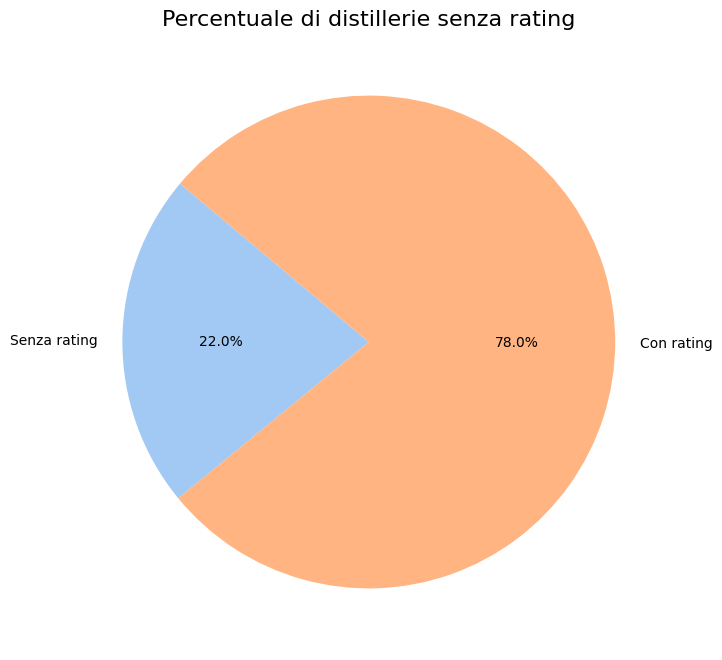

In [14]:
# Calcolo della percentuale
percentuale_senza_rating = len(distillerie_senza_rating) / len(df) * 100
percentuale_con_rating = 100 - percentuale_senza_rating

# Grafico a torta
plt.figure(figsize=(8, 8))
plt.pie(
    [percentuale_senza_rating, percentuale_con_rating],
    labels=['Senza rating', 'Con rating'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("pastel")
)
plt.title("Percentuale di distillerie senza rating", fontsize=16)
plt.show()


###  Confronto tra paesi
Posso confrontare i paesi con il maggior numero di distillerie senza rating con quelli che hanno un alto numero di distillerie in generale. Questo confronto può essere visualizzato con un grafico a barre raggruppate.

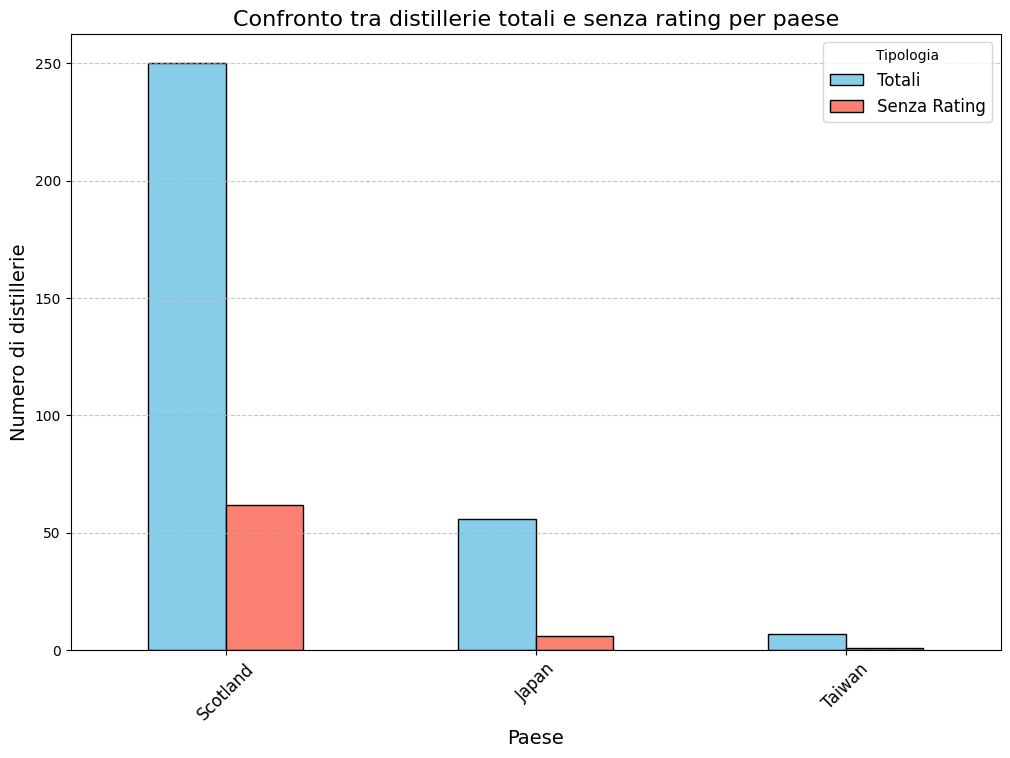

In [15]:
# Calcola il numero totale di distillerie per paese
distillerie_totali_per_paese = df['country'].value_counts()

# Calcola il numero di distillerie senza rating per paese
distillerie_senza_rating_per_paese = distillerie_senza_rating['country'].value_counts()

# Unione dei due dataset
confronto = pd.DataFrame({
    'Totali': distillerie_totali_per_paese,
    'Senza Rating': distillerie_senza_rating_per_paese
}).fillna(0)

# Grafico a barre raggruppate
confronto.plot(kind='bar', figsize=(12, 8), color=['skyblue', 'salmon'], edgecolor='black')
plt.title("Confronto tra distillerie totali e senza rating per paese", fontsize=16)
plt.xlabel("Paese", fontsize=14)
plt.ylabel("Numero di distillerie", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Tipologia", fontsize=12)
plt.show()


### ESPORTO I DATI IN UN FILE CSV 

In [16]:
df.to_csv('distilleries_data.csv', index=False)
print("Dati esportati con successo!")


Dati esportati con successo!
